## In This Project We Describe Using scikit Logistic Regression to classify & confusion matrix

### Import Necessary Libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
framingham_df = pd.read_csv("framingham.csv")
framingham_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### We Need to Describe DataFrame

In [3]:
framingham_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Data pre-processing and selection

In [4]:
framingham_df = framingham_df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP',   'diaBP', 'glucose','heartRate']]
framingham_df['currentSmoker'] = framingham_df['currentSmoker'].astype('int')
framingham_df.head()

,male,age,education,currentSmoker,cigsPerDay,totChol,sysBP,diaBP,glucose,heartRate
0,1,39,4.0,0,0.0,195.0,106.0,70.0,77.0,80.0
1,0,46,2.0,0,0.0,250.0,121.0,81.0,76.0,95.0
2,1,48,1.0,1,20.0,245.0,127.5,80.0,70.0,75.0
3,0,61,3.0,1,30.0,225.0,150.0,95.0,103.0,65.0
4,0,46,3.0,1,23.0,285.0,130.0,84.0,85.0,85.0


### Clean DataFrame With NAN Opjects

In [5]:
framingham_df['glucose'].isnull().values.any()
framingham_df

,male,age,education,currentSmoker,cigsPerDay,totChol,sysBP,diaBP,glucose,heartRate
0,1,39,4.0,0,0.0,195.0,106.0,70.0,77.0,80.0
1,0,46,2.0,0,0.0,250.0,121.0,81.0,76.0,95.0
2,1,48,1.0,1,20.0,245.0,127.5,80.0,70.0,75.0
3,0,61,3.0,1,30.0,225.0,150.0,95.0,103.0,65.0
4,0,46,3.0,1,23.0,285.0,130.0,84.0,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,313.0,179.0,92.0,86.0,66.0
4234,1,51,3.0,1,43.0,207.0,126.5,80.0,68.0,65.0
4235,0,48,2.0,1,20.0,248.0,131.0,72.0,86.0,84.0
4236,0,44,1.0,1,15.0,210.0,126.5,87.0,NaN,86.0


In [6]:

framingham_df.fillna(0)

,male,age,education,currentSmoker,cigsPerDay,totChol,sysBP,diaBP,glucose,heartRate
0,1,39,4.0,0,0.0,195.0,106.0,70.0,77.0,80.0
1,0,46,2.0,0,0.0,250.0,121.0,81.0,76.0,95.0
2,1,48,1.0,1,20.0,245.0,127.5,80.0,70.0,75.0
3,0,61,3.0,1,30.0,225.0,150.0,95.0,103.0,65.0
4,0,46,3.0,1,23.0,285.0,130.0,84.0,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,313.0,179.0,92.0,86.0,66.0
4234,1,51,3.0,1,43.0,207.0,126.5,80.0,68.0,65.0
4235,0,48,2.0,1,20.0,248.0,131.0,72.0,86.0,84.0
4236,0,44,1.0,1,15.0,210.0,126.5,87.0,0.0,86.0


In [7]:
np.isnan(framingham_df.any()) #and gets False
np.isfinite(framingham_df.all())

male             True
age              True
education        True
currentSmoker    True
cigsPerDay       True
totChol          True
sysBP            True
diaBP            True
glucose          True
heartRate        True
dtype: bool

In [8]:
X = framingham_df.drop(['glucose'], axis=1).values

In [9]:
framingham_df.fillna(0,inplace=True)

### Finding Shape of DataSet

In [10]:
framingham_df.shape

(4238, 10)

In [11]:
X = np.asarray(framingham_df[['male', 'age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'glucose', 'heartRate']])
X[0:5]

array([[  1. ,  39. ,   4. ,   0. , 195. , 106. ,  70. ,  77. ,  80. ],
       [  0. ,  46. ,   2. ,   0. , 250. , 121. ,  81. ,  76. ,  95. ],
       [  1. ,  48. ,   1. ,  20. , 245. , 127.5,  80. ,  70. ,  75. ],
       [  0. ,  61. ,   3. ,  30. , 225. , 150. ,  95. , 103. ,  65. ],
       [  0. ,  46. ,   3. ,  23. , 285. , 130. ,  84. ,  85. ,  85. ]])

In [12]:
y = np.asarray(framingham_df['currentSmoker'])
y [0:5]

array([0, 0, 1, 1, 1])

### Normalizing DataSet

In [13]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.1531919 , -1.23495068,  1.96608614, -0.75132224, -0.76087026,
        -1.19590711, -1.08262515,  0.07720798,  0.34262779],
       [-0.86715836, -0.41825733,  0.06655962, -0.75132224,  0.31411609,
        -0.51518725, -0.15898843,  0.0467814 ,  1.58433854],
       [ 1.1531919 , -0.18491638, -0.88320363,  0.92920959,  0.21639006,
        -0.22020864, -0.24295541, -0.13577807, -0.0712758 ],
       [-0.86715836,  1.33179984,  1.01632288,  1.76947551, -0.17451407,
         0.80087114,  1.0165492 ,  0.86829905, -0.89908297],
       [-0.86715836, -0.41825733,  1.01632288,  1.18128937,  0.99819832,
        -0.10675533,  0.09291249,  0.32062062,  0.75653137]])

### Train / Test DataSet

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3390, 9) (3390,)
Test set: (848, 9) (848,)


### Modeling Data

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Predicting Using DataSet

In [16]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

### predict_proba returns estimates for all classes, ordered by the label of classes

In [17]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.75644897, 0.24355103],
       [0.8440834 , 0.1559166 ],
       [0.06582091, 0.93417909],
       ...,
       [0.00149714, 0.99850286],
       [0.56641671, 0.43358329],
       [0.01109238, 0.98890762]])

### Evaluation Using jaccard index 

In [18]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8754940711462451

### Confusion Matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[342  63]
 [  0 443]]


Confusion matrix, without normalization
[[342  63]
 [  0 443]]


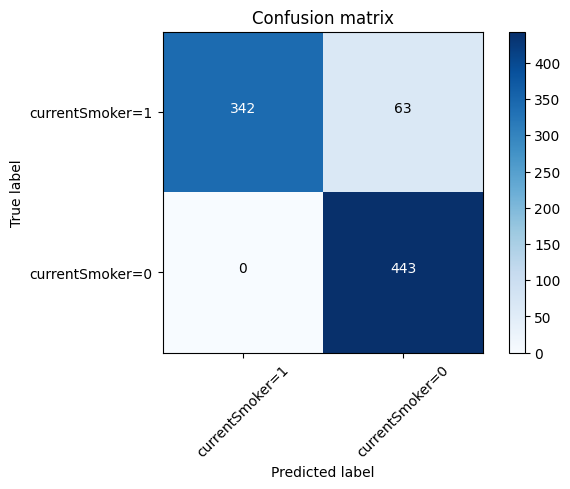

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['currentSmoker=1','currentSmoker=0'],normalize= False,  title='Confusion matrix')

### Prediction for recall - F1-Score - Support

In [21]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       443
           1       1.00      0.84      0.92       405

    accuracy                           0.93       848
   macro avg       0.94      0.92      0.92       848
weighted avg       0.93      0.93      0.93       848



### Using Log Loss For Evaluation

In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.2665360655554063